### Importing liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier

### Loading the data

In [2]:
data=pd.read_csv('G:/GFG ( Python For Data Sci )/Machine Learning/feature-engineering/global_heat_index.csv')
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


<h4>as we can see in the dataframe that there are 0 solar_radiance btw hour : <h4>
    

    (0-7) practically midnight and sun rise
        and (18-24) practically sunset and night.  

### Cleaning the data

In [4]:
# drop the data of above case
data[(data['Hour']>=0) & (data['Hour']<=7) ].head(10)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
24,2011,1,2,0,3,10.231350,984.838196,61.345492,79.954536,2.360912,0
25,2011,1,2,1,3,9.653407,984.457092,63.566375,87.481873,2.193934,0


In [5]:
to_be_drop=data[(data['Hour']>=0) & (data['Hour']<=7) ]
index=to_be_drop.index

In [6]:
data[data['Hour']==7]

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
31,2011,1,2,7,5,8.805419,986.882507,77.175647,91.900917,0.894640,0
55,2011,1,3,7,3,8.282325,988.466797,73.971182,109.943802,2.480257,0
79,2011,1,4,7,3,6.784406,989.346802,81.101336,95.365372,2.842985,0
103,2011,1,5,7,4,6.550716,988.182495,86.362488,98.761543,2.181355,0
...,...,...,...,...,...,...,...,...,...,...,...
17407,2012,12,27,7,-1,11.685169,985.307312,41.234731,153.499451,3.526653,0
17431,2012,12,28,7,-1,12.757731,982.198669,36.396704,212.330536,2.856956,0
17455,2012,12,29,7,-4,9.062870,985.433044,37.631709,29.472927,3.193356,0
17479,2012,12,30,7,-5,9.855198,987.156982,34.337976,41.857796,3.397347,0


### droping the values

In [7]:
data.shape

(17520, 11)

In [8]:
df=data.drop(index=index,axis=0)
df.shape

(11680, 11)

In [9]:
df.head(10)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363
10,2011,1,1,10,3,18.956082,988.054504,36.747087,72.488327,0.545695,533
11,2011,1,1,11,2,21.354047,987.463867,29.157015,12.976929,0.980117,649
12,2011,1,1,12,2,22.161257,986.386169,27.593071,4.777779,1.411915,698
13,2011,1,1,13,2,22.256216,985.736511,27.274695,5.355347,1.747909,675
14,2011,1,1,14,2,21.725884,985.521545,27.819289,6.877182,2.005287,582
15,2011,1,1,15,2,20.507269,985.279663,30.023284,10.448921,2.206879,430
16,2011,1,1,16,5,18.190106,985.668091,43.187772,16.174072,2.304465,232
17,2011,1,1,17,5,15.665956,986.169922,49.346720,23.485420,2.516871,25


### Input and Output Data

In [10]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
y.values

array([159, 363, 533, ...,   0,   0,   0], dtype=int64)

 ### Feature Scaling :MinMax Scalar

In [11]:
scalar=MinMaxScaler()
x=pd.DataFrame(scalar.fit_transform(x))

In [12]:
x.rename(columns={0:'Year',1:'Month',2:'Day',3:'Hour',4:'Dew Point',5:'Temperature',
                  6:'Pressure',7:'Relative Humidity',8:'Wind Direction',9:'Wind Speed'},inplace=True)
x.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
0,0.0,0.0,0.0,0.000000,0.563636,0.092442,0.809220,0.549672,0.314714,0.200938
1,0.0,0.0,0.0,0.066667,0.563636,0.156131,0.820218,0.469137,0.325854,0.147356
2,0.0,0.0,0.0,0.133333,0.563636,0.246678,0.814713,0.363433,0.201285,0.073529
3,0.0,0.0,0.0,0.200000,0.545455,0.301086,0.794060,0.286434,0.035955,0.135483
4,0.0,0.0,0.0,0.266667,0.545455,0.319401,0.756375,0.270569,0.013177,0.197063


### Correlation Matrix with HeatMap

In [13]:
cor_matrix= df.corr()
cor_matrix

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
Year,1.000000e+00,-8.717727e-14,-9.941484e-14,-5.035725e-15,-0.140708,0.023151,0.020229,-0.168737,0.017662,0.034525,-0.010085
Month,-8.717727e-14,1.000000e+00,1.189318e-02,1.278397e-16,0.493933,-0.028333,-0.033054,0.471371,-0.121192,-0.232327,-0.068067
Day,-9.941484e-14,1.189318e-02,1.000000e+00,2.160394e-17,-0.019729,-0.012513,0.045382,-0.007178,-0.028423,0.049015,0.008283
Hour,-5.035725e-15,1.278397e-16,2.160394e-17,1.000000e+00,0.012812,-0.275333,-0.080043,0.174144,-0.055156,0.216998,-0.741185
Dew Point,-1.407080e-01,4.939334e-01,-1.972871e-02,1.281163e-02,1.000000,0.221607,-0.589329,0.814076,0.143097,0.016260,-0.028780
Temperature,2.315147e-02,-2.833279e-02,-1.251271e-02,-2.753331e-01,0.221607,1.000000,-0.644330,-0.288862,0.445151,0.195015,0.544130
Pressure,2.022859e-02,-3.305425e-02,4.538162e-02,-8.004301e-02,-0.589329,-0.644330,1.000000,-0.265094,-0.425581,-0.389687,-0.085092
Relative Humidity,-1.687365e-01,4.713706e-01,-7.178469e-03,1.741441e-01,0.814076,-0.288862,-0.265094,1.000000,-0.072435,-0.127274,-0.314080
Wind Direction,1.766237e-02,-1.211921e-01,-2.842324e-02,-5.515585e-02,0.143097,0.445151,-0.425581,-0.072435,1.000000,0.144419,0.153991
Wind Speed,3.452482e-02,-2.323274e-01,4.901542e-02,2.169984e-01,0.016260,0.195015,-0.389687,-0.127274,0.144419,1.000000,-0.127678


### Visualizing the Correlation

<Axes: >

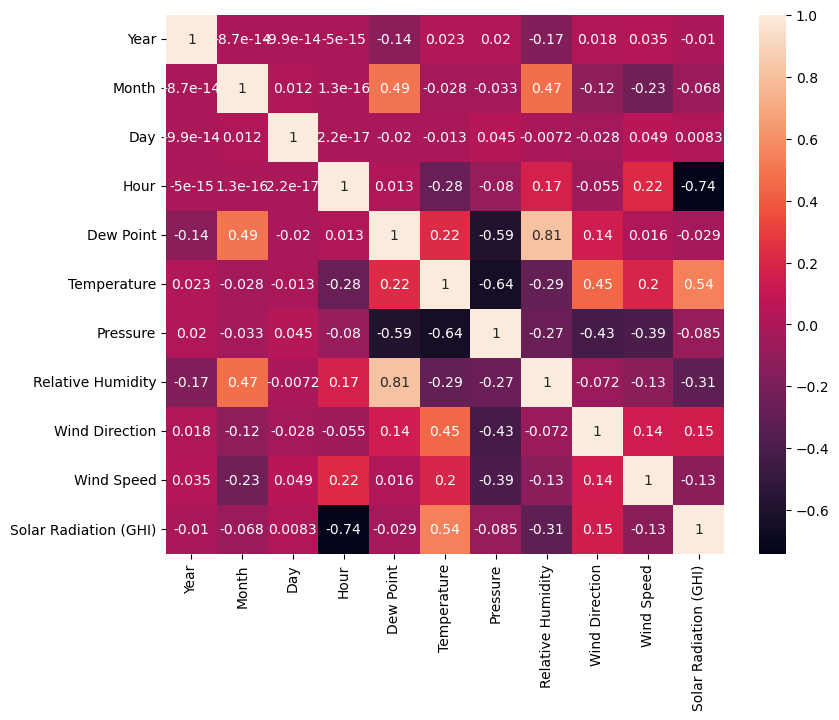

In [14]:
plt.figure(figsize=(9,7))
sns.heatmap(cor_matrix,annot=True)

## <font color='green'>ExtraTreeClassifier</font>

In [15]:
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [16]:
feature_importance=model.feature_importances_
feature_importance

array([0.0225515 , 0.03893455, 0.08960656, 0.24563083, 0.07443153,
       0.12091119, 0.10130209, 0.10648216, 0.09846017, 0.10168942])

In [17]:
len(df.columns)

11

In [18]:
len(x.columns)

10

In [19]:
col=x.columns

In [20]:
zipped=list(zip(col,feature_importance))

In [21]:
zipped

[('Year', 0.022551498469396376),
 ('Month', 0.038934551921618356),
 ('Day', 0.08960655929783282),
 ('Hour', 0.24563082726638338),
 ('Dew Point', 0.07443153145071951),
 ('Temperature', 0.12091119021108168),
 ('Pressure', 0.10130209398954332),
 ('Relative Humidity', 0.10648215667180606),
 ('Wind Direction', 0.09846016899391405),
 ('Wind Speed', 0.10168942172770448)]

In [28]:
Feature_Importance_score=pd.DataFrame(zipped)
Feature_Importance_score

,0,1
0,Year,0.022551
1,Month,0.038935
2,Day,0.089607
3,Hour,0.245631
4,Dew Point,0.074432
5,Temperature,0.120911
6,Pressure,0.101302
7,Relative Humidity,0.106482
8,Wind Direction,0.098460
9,Wind Speed,0.101689


In [29]:
Feature_Importance_score.rename(columns={0:'Feature_Importance_score[]',1:'Feature Score'},inplace=True)
type(Feature_Importance_score)

pandas.core.frame.DataFrame

In [30]:
Feature_Importance_score

,Feature_Importance_score[],Feature Score
0,Year,0.022551
1,Month,0.038935
2,Day,0.089607
3,Hour,0.245631
4,Dew Point,0.074432
5,Temperature,0.120911
6,Pressure,0.101302
7,Relative Humidity,0.106482
8,Wind Direction,0.098460
9,Wind Speed,0.101689


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Year'),
  Text(1, 0, 'Month'),
  Text(2, 0, 'Day'),
  Text(3, 0, 'Hour'),
  Text(4, 0, 'Dew Point'),
  Text(5, 0, 'Temperature'),
  Text(6, 0, 'Pressure'),
  Text(7, 0, 'Relative Humidity'),
  Text(8, 0, 'Wind Direction'),
  Text(9, 0, 'Wind Speed')])

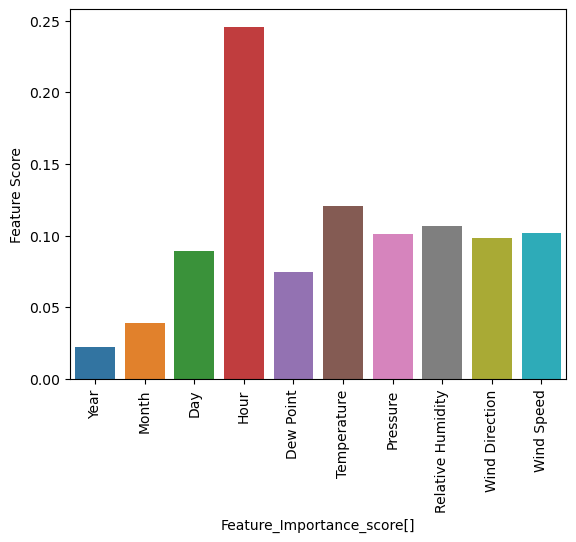

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.barplot(data=Feature_Importance_score,x='Feature_Importance_score[]',y='Feature Score')
plt.xticks(rotation=90)

## <font color='green'>SelectKBest Method</font>

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [42]:
BestFeatures=SelectKBest(score_func=chi2,k=10).fit(x,y)

SelectKBest(score_func=<function chi2 at 0x000001EA7E4902C0>)

In [44]:
Scores=BestFeatures.scores_

In [45]:
zipped=list(zip(col,Scores))

In [48]:
kbestscore=pd.DataFrame(zipped,columns=['Feature Names','Scores'])
kbestscore

,Feature Names,Scores
0,Year,507.155021
1,Month,251.691394
2,Day,207.532617
3,Hour,1741.734448
4,Dew Point,69.603015
5,Temperature,334.411823
6,Pressure,179.469039
7,Relative Humidity,352.204777
8,Wind Direction,225.254340
9,Wind Speed,173.873373


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Year'),
  Text(1, 0, 'Month'),
  Text(2, 0, 'Day'),
  Text(3, 0, 'Hour'),
  Text(4, 0, 'Dew Point'),
  Text(5, 0, 'Temperature'),
  Text(6, 0, 'Pressure'),
  Text(7, 0, 'Relative Humidity'),
  Text(8, 0, 'Wind Direction'),
  Text(9, 0, 'Wind Speed')])

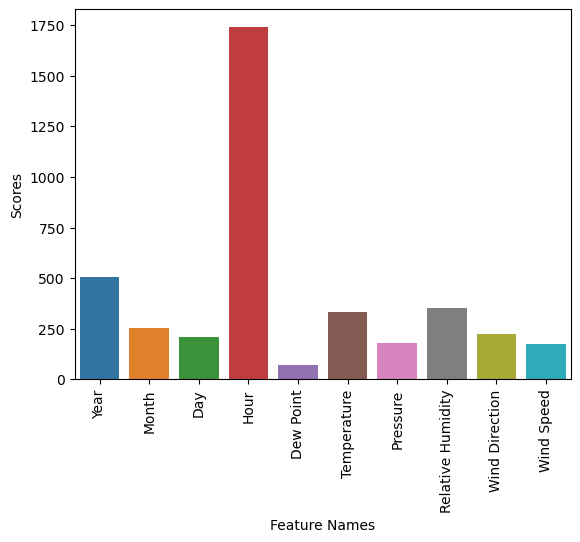

In [49]:
plt.figure()
sns.barplot(data=kbestscore,x='Feature Names',y='Scores')
plt.xticks(rotation=90)